# Dalitz plot notebook
In the notebook I demonstrate how to
 - define julia funtions
 - plot 1d of 2d functions uning library MathPlotLib to plot 
 - create a dalitz plot in Cartesian coordinated and in the Triangle coordinates

### Plotting functions

In [1]:
using PyPlot
using PyCall
@pyimport numpy.ma as ma

# simple flat plot
function Plot(f, x)
    fx=[f(xi) for xi in x]
    plot(x, fx)
end

# plot of function of 2 variables, 3D plot
function Plot(f, x, y)
    fx=[[xi, yi, f(xi,yi)] for xi in x for yi in y]
    surf([fxi[1] for fxi in fx], [fxi[2] for fxi in fx], [fxi[3] for fxi in fx])
end

# plot of function of 2 variables, color-codded
function DensityPlot(f, x, y)
    xy = [[xi, yi] for xi in x, yi in y]
    zv = [f((xy[i,j][1]+xy[i+1,j+1][1])/2.,
            (xy[i,j][2]+xy[i+1,j+1][2])/2.) for i in 1:(size(xy,1)-1), j in 1:(size(xy,2)-1)]
    zvmask = pycall(ma.array, Any, zv, mask=isnan.(zv))
    xv = [xy[i,j][1] for i in 1:size(xy,1), j in 1:size(xy,2)]
    yv = [xy[i,j][2] for i in 1:size(xy,1), j in 1:size(xy,2)]
    pcolor(xv, yv, zvmask)
end

DensityPlot (generic function with 1 method)

### Kinematics functions

In [2]:
# K\"allen function
λ(x,y,z)=x^2+y^2+z^2-2*x*y-2*y*z-2*z*x

# Break-up momentum
psq(x,y,z)=λ(x,y,z)/(4*x);

# scattering angle in the s-channel
cosθsq(s,t,Msq,m1sq,m2sq,m3sq)=(2s*(t-m2sq-m3sq)-(s+m2sq-m1sq)*(Msq-s-m3sq))^2/(λ(s,m2sq,m3sq)*λ(Msq,s,m1sq))

# inverse to previous one
function t(s,cosθ,Msq,m1sq,m2sq,m3sq)
    e2 = (s+m2sq-m1sq)/(2*sqrt(s))
    e3 = (Msq-s-m3sq)/(2*sqrt(s))
    p2 = sqrt(λ(s,m1sq,m2sq)/(4*s))
    p3 = sqrt(λ(Msq,s,m3sq)/(4*s))
    m2sq+m3sq+2*e2*e3-2*p2*p3*cosθ
end

# border function returns 0 or 1 whether the dacay is forbidden or allowed
function border(s,t,Msq,m1sq,m2sq,m3sq)
    val = 0.0
    √s =sqrt(s); √t =sqrt(t)
    m1 = sqrt(m1sq); m2 = sqrt(m2sq); m3 = sqrt(m3sq)
    Mtot = sqrt(Msq)
    if (√s > m1+m2) && (√s < Mtot-m3) && (√t > m2+m3) && (√t < Mtot-m1) && (cosθsq(s,t,Msq,m1sq,m2sq,m3sq) < 1.)
        val = 1
    end
    return val
end

# BW function
BreitWigner(s,M,Γ) = 1./(M^2-s-1im*M*Γ);

## Plot your matrix element
just fill $\textrm{Matr(s,t)}$ function

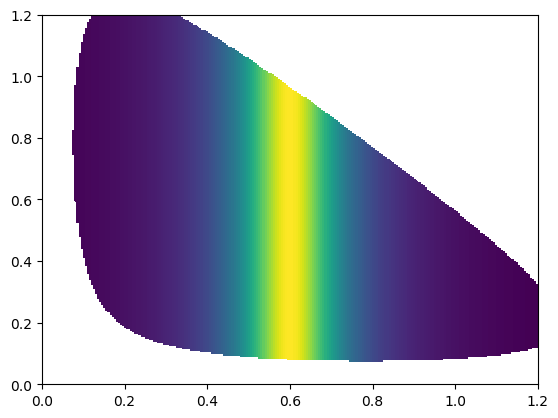

PyObject <matplotlib.collections.PolyCollection object at 0x7f0a96f430d0>

In [8]:
# Function for the square of the matrix element
mπ=0.139;
mρ=0.7755; Γρ=0.15; Ma1 = 1.26;

# This is a function fo fill
function Matr(s,t)
    1./(mρ^2-s-1im*Γρ*mρ)
end

# MatrSq just add missing values outside of the Dalitz plot
function MatrSq(s,t)
    if (border(s,t,Ma1^2,mπ^2,mπ^2,mπ^2) == 0)
        return NaN
    end
    abs(Matr(s,t))^2
end

# Plot
DensityPlot(MatrSq, 0:0.005:1.2, 0:0.005:1.2)